In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pip install langdetect

     |████████████████████████████████| 981 kB 4.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=820248af7f98a8e31154e705f19a9fcfd2d0786b46a2aeba2d6709bff7735131
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
pip install en_core_web_sm

In [ ]:
import spacy
spacy.cli.download('en_core_web_lg')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from textblob import TextBlob
## for word embedding
import gensim.downloader as gensim_api
## for topic modeling
import gensim
## for vectorizer
from sklearn import feature_extraction, manifold
## for language detection
import langdetect 
import spacy
nlp=spacy.load('en_core_web_sm')
ner = spacy.load("en_core_web_lg")
import collections
## for text processing
import re
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('drive/MyDrive/Text Analytics/Dati/archive/all-data.csv', encoding = "ISO-8859-1",header=None,sep=',')
df = df.rename(columns={0: 'Sentiment', 1: 'News'})

In [ ]:
df.head()

,Sentiment,News
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
## tag text
txt = df["News"].iloc[0]
doc = ner(txt)
## display result
spacy.displacy.render(doc, style="ent")

'<div class="entities" style="line-height: 2.5; direction: ltr">According to \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Gran\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n , the company has no plans to move all production to \n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Russia\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n , although that is where the company is growing .</div>'

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
print("--- remove stopwords ---")
txt = [word for word in txt if word not in lst_stopwords]
print(txt)

--- remove stopwords ---
['A', 'c', 'c', 'r', 'n', 'g', ' ', ' ', 'G', 'r', 'n', ' ', ',', ' ', 'h', 'e', ' ', 'c', 'p', 'n', ' ', 'h', ' ', 'n', ' ', 'p', 'l', 'n', ' ', ' ', 'v', 'e', ' ', 'l', 'l', ' ', 'p', 'r', 'u', 'c', 'n', ' ', ' ', 'R', 'u', ' ', ',', ' ', 'l', 'h', 'u', 'g', 'h', ' ', 'h', ' ', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'h', 'e', ' ', 'c', 'p', 'n', ' ', ' ', 'g', 'r', 'w', 'n', 'g', ' ', '.']


In [ ]:
print("--- stemming ---")
ps = nltk.stem.porter.PorterStemmer()
print([ps.stem(word) for word in txt])
print("--- lemmatisation ---")
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in txt])

--- stemming ---
['A', 'c', 'c', 'r', 'n', 'g', ' ', ' ', 'G', 'r', 'n', ' ', ',', ' ', 'h', 'e', ' ', 'c', 'p', 'n', ' ', 'h', ' ', 'n', ' ', 'p', 'l', 'n', ' ', ' ', 'v', 'e', ' ', 'l', 'l', ' ', 'p', 'r', 'u', 'c', 'n', ' ', ' ', 'R', 'u', ' ', ',', ' ', 'l', 'h', 'u', 'g', 'h', ' ', 'h', ' ', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'h', 'e', ' ', 'c', 'p', 'n', ' ', ' ', 'g', 'r', 'w', 'n', 'g', ' ', '.']
--- lemmatisation ---
['A', 'c', 'c', 'r', 'n', 'g', ' ', ' ', 'G', 'r', 'n', ' ', ',', ' ', 'h', 'e', ' ', 'c', 'p', 'n', ' ', 'h', ' ', 'n', ' ', 'p', 'l', 'n', ' ', ' ', 'v', 'e', ' ', 'l', 'l', ' ', 'p', 'r', 'u', 'c', 'n', ' ', ' ', 'R', 'u', ' ', ',', ' ', 'l', 'h', 'u', 'g', 'h', ' ', 'h', ' ', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 'h', 'e', ' ', 'c', 'p', 'n', ' ', ' ', 'g', 'r', 'w', 'n', 'g', ' ', '.']


In [ ]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, lst_stopwords=None, flg_stemm=False, flg_lemm=True):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [ ]:
df["text_clean"] = df["News"].apply(lambda x: utils_preprocess_text(x,  lst_stopwords, flg_stemm=False, flg_lemm=True,))

In [ ]:
df.head()

,Sentiment,News,text_clean
0,neutral,"According to Gran , the company has no plans t...",according gran company plan move production ru...
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area le 100000 ...
2,negative,The international electronic industry company ...,international electronic industry company elco...
3,positive,With the new production plant the company woul...,new production plant company would increase ca...
4,positive,According to the company 's updated strategy f...,according company updated strategy year 200920...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df['Sentiment'].groupby(df.Sentiment).count()
data

Sentiment
negative     604
neutral     2879
positive    1363
Name: Sentiment, dtype: int64

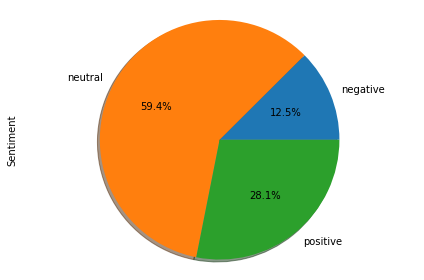

In [ ]:
fig1, ax1 = plt.subplots()
data.plot.pie(autopct="%.1f%%",shadow=True)
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
df['lang'] = df["News"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")
df.head()

,Sentiment,News,text_clean,lang
0,neutral,"According to Gran , the company has no plans t...",according gran company plan move production ru...,en
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area le 100000 ...,en
2,negative,The international electronic industry company ...,international electronic industry company elco...,en
3,positive,With the new production plant the company woul...,new production plant company would increase ca...,en
4,positive,According to the company 's updated strategy f...,according company updated strategy year 200920...,en


(array([4.823e+03, 6.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

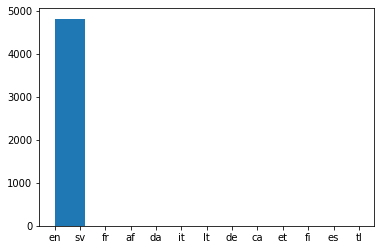

In [ ]:
plt.hist(df['lang'])

In [ ]:
df['word_count'] = df["News"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["News"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["News"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']
df.head()

,Sentiment,News,text_clean,lang,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,neutral,"According to Gran , the company has no plans t...",according gran company plan move production ru...,en,25,103,2,4.120000,12.5
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area le 100000 ...,en,31,160,2,5.161290,15.5
2,negative,The international electronic industry company ...,international electronic industry company elco...,en,36,193,2,5.361111,18.0
3,positive,With the new production plant the company woul...,new production plant company would increase ca...,en,33,174,2,5.272727,16.5
4,positive,According to the company 's updated strategy f...,according company updated strategy year 200920...,en,41,163,2,3.975610,20.5


In [ ]:
df["sentiment_encoded"] = df['Sentiment'].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)
df.head()

,Sentiment,News,text_clean,lang,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment_encoded
0,neutral,"According to Gran , the company has no plans t...",according gran company plan move production ru...,en,25,103,2,4.120000,12.5,0.000000
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area le 100000 ...,en,31,160,2,5.161290,15.5,0.000000
2,negative,The international electronic industry company ...,international electronic industry company elco...,en,36,193,2,5.361111,18.0,-0.300000
3,positive,With the new production plant the company woul...,new production plant company would increase ca...,en,33,174,2,5.272727,16.5,0.227273
4,positive,According to the company 's updated strategy f...,according company updated strategy year 200920...,en,41,163,2,3.975610,20.5,0.227273


In [ ]:
print(df["News"].iloc[0], " --> ", df["Sentiment"].iloc[0])

According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  -->  neutral


In [ ]:
## tag text and exctract tags into a list
df["tags"] = df["News"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )
## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
df["tags"] = df["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []
for lst in df["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     df["tags_"+feature] = df["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))

## print result
df.head()

,Sentiment,News,text_clean,lang,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment_encoded,tags,tags_WORK_OF_ART,tags_CARDINAL,tags_PERCENT,tags_TIME,tags_FAC,tags_PRODUCT,tags_LAW,tags_PERSON,tags_MONEY,tags_GPE,tags_ORG,tags_QUANTITY,tags_LOC,tags_NORP,tags_EVENT,tags_ORDINAL,tags_LANGUAGE,tags_DATE
0,neutral,"According to Gran , the company has no plans t...",according gran company plan move production ru...,en,25,103,2,4.120000,12.5,0.000000,"[{('Gran', 'ORG'): 1}, {('Russia', 'GPE'): 1}]",0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area le 100000 ...,en,31,160,2,5.161290,15.5,0.000000,"[{('no less than 100,000 square meters', 'QUAN...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,negative,The international electronic industry company ...,international electronic industry company elco...,en,36,193,2,5.361111,18.0,-0.300000,"[{('Elcoteq', 'ORG'): 1}, {('tens', 'CARDINAL'...",0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1
3,positive,With the new production plant the company woul...,new production plant company would increase ca...,en,33,174,2,5.272727,16.5,0.227273,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,positive,According to the company 's updated strategy f...,according company updated strategy year 200920...,en,41,163,2,3.975610,20.5,0.227273,"[{('the years 2009-2012', 'DATE'): 1}, {('Basw...",0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


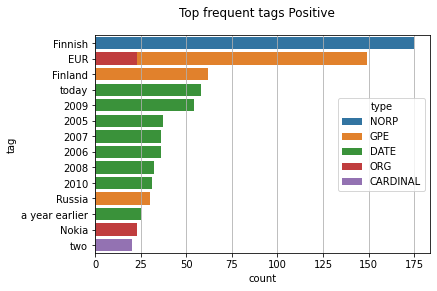

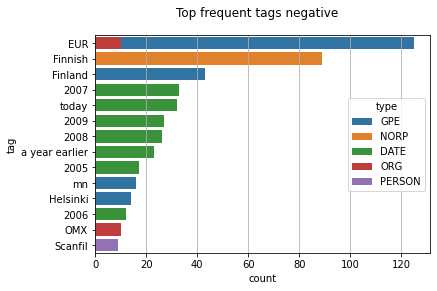

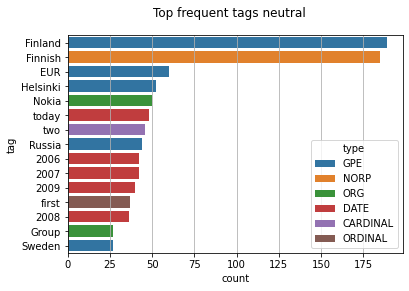

In [ ]:
tags_list = df[df['Sentiment']=='positive']["tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
dtf_tags["count"] = 1
dtf_tags = dtf_tags.groupby(['type',  
                'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags Positive", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", 
            data=dtf_tags.iloc[:15,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

tags_list_n = df[df['Sentiment']=='negative']["tags"].sum()
map_lst_n = list(map(lambda x: list(x.keys())[0], tags_list_n))
dtf_tags_n = pd.DataFrame(map_lst_n, columns=['tag','type'])
dtf_tags_n["count"] = 1
dtf_tags_n = dtf_tags_n.groupby(['type',  
                'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags negative", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", 
            data=dtf_tags_n.iloc[:15,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

tags_list_1 = df[df['Sentiment']=='neutral']["tags"].sum()
map_lst_1 = list(map(lambda x: list(x.keys())[0], tags_list_1))
dtf_tags_1 = pd.DataFrame(map_lst_1, columns=['tag','type'])
dtf_tags_1["count"] = 1
dtf_tags_1 = dtf_tags_1.groupby(['type',  
                'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags neutral", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", 
            data=dtf_tags_1.iloc[:15,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

In [ ]:
## predict wit NER
txt = df["News"].iloc[0]
entities = ner(txt).ents
## tag text
tagged_txt = txt
for tag in entities:
    tagged_txt = re.sub(tag.text, "_".join(tag.text.split()), 
                        tagged_txt) 
## show result
print(tagged_txt)

According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .


In [ ]:
print("--- stemming ---")
ps = nltk.stem.porter.PorterStemmer()
print([ps.stem(word) for word in txt])
print("--- lemmatisation ---")
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in txt])

--- stemming ---
['A', 'c', 'c', 'o', 'r', 'd', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'G', 'r', 'a', 'n', ' ', ',', ' ', 't', 'h', 'e', ' ', 'c', 'o', 'm', 'p', 'a', 'n', 'y', ' ', 'h', 'a', 's', ' ', 'n', 'o', ' ', 'p', 'l', 'a', 'n', 's', ' ', 't', 'o', ' ', 'm', 'o', 'v', 'e', ' ', 'a', 'l', 'l', ' ', 'p', 'r', 'o', 'd', 'u', 'c', 't', 'i', 'o', 'n', ' ', 't', 'o', ' ', 'R', 'u', 's', 's', 'i', 'a', ' ', ',', ' ', 'a', 'l', 't', 'h', 'o', 'u', 'g', 'h', ' ', 't', 'h', 'a', 't', ' ', 'i', 's', ' ', 'w', 'h', 'e', 'r', 'e', ' ', 't', 'h', 'e', ' ', 'c', 'o', 'm', 'p', 'a', 'n', 'y', ' ', 'i', 's', ' ', 'g', 'r', 'o', 'w', 'i', 'n', 'g', ' ', '.']
--- lemmatisation ---
['A', 'c', 'c', 'o', 'r', 'd', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'G', 'r', 'a', 'n', ' ', ',', ' ', 't', 'h', 'e', ' ', 'c', 'o', 'm', 'p', 'a', 'n', 'y', ' ', 'h', 'a', 's', ' ', 'n', 'o', ' ', 'p', 'l', 'a', 'n', 's', ' ', 't', 'o', ' ', 'm', 'o', 'v', 'e', ' ', 'a', 'l', 'l', ' ', 'p', 'r', 'o', 'd', 'u', 'c', 't', 'i',

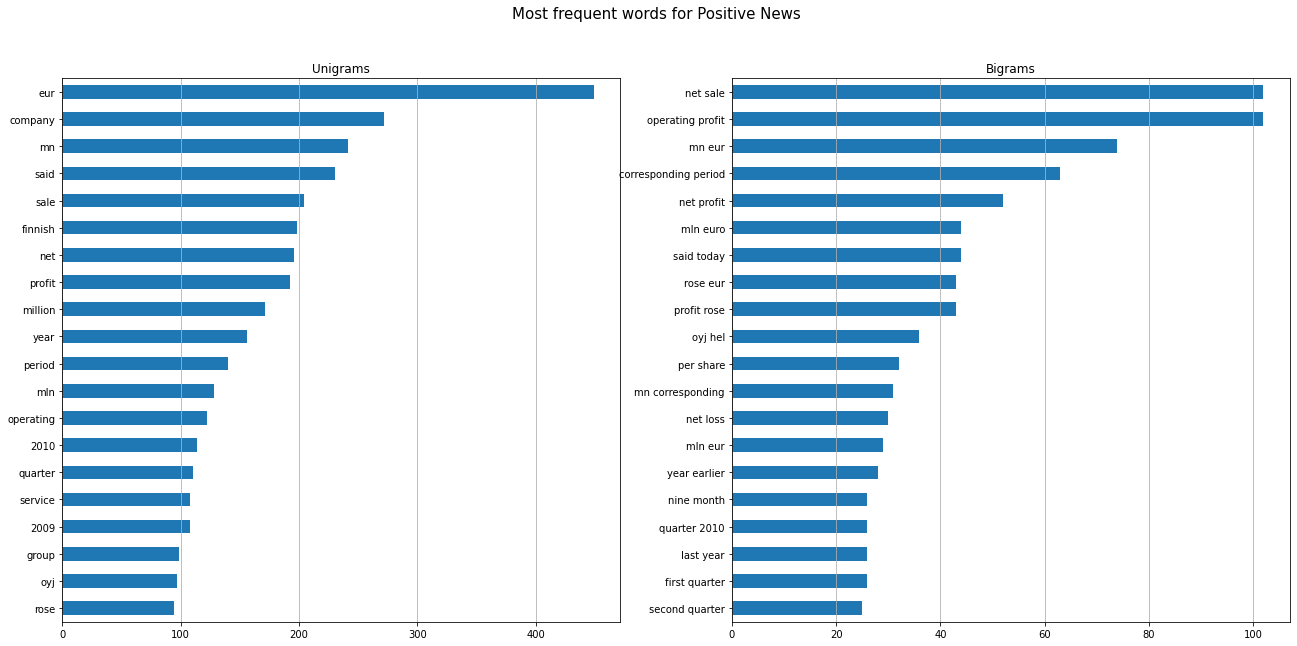

In [ ]:
y = "positive"
corpus = df[df["Sentiment"]==y]["text_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig_dims = (22, 10)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
fig.suptitle("Most frequent words for Positive News", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:20,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:20,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

In [ ]:
lst_words = ["profit", "net", "quarter"]
## count
lst_grams = [len(word.split(" ")) for word in lst_words]
vectorizer = feature_extraction.text.CountVectorizer(
                 vocabulary=lst_words, 
                 ngram_range=(min(lst_grams),max(lst_grams)))
dtf_X = pd.DataFrame(vectorizer.fit_transform(df["text_clean"]).todense(), columns=lst_words)
## add the new features as columns
dtf = pd.concat([df, dtf_X.set_index(df.index)], axis=1)
dtf.head()

,Sentiment,News,text_clean,lang,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment_encoded,tags,tags_WORK_OF_ART,tags_CARDINAL,tags_PERCENT,tags_TIME,tags_FAC,tags_PRODUCT,tags_LAW,tags_PERSON,tags_MONEY,tags_GPE,tags_ORG,tags_QUANTITY,tags_LOC,tags_NORP,tags_EVENT,tags_ORDINAL,tags_LANGUAGE,tags_DATE,profit,net,quarter
0,neutral,"According to Gran , the company has no plans t...",according gran company plan move production ru...,en,25,103,2,4.120000,12.5,0.000000,"[{('Gran', 'ORG'): 1}, {('Russia', 'GPE'): 1}]",0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area le 100000 ...,en,31,160,2,5.161290,15.5,0.000000,"[{('no less than 100,000 square meters', 'QUAN...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,negative,The international electronic industry company ...,international electronic industry company elco...,en,36,193,2,5.361111,18.0,-0.300000,"[{('Elcoteq', 'ORG'): 1}, {('tens', 'CARDINAL'...",0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0
3,positive,With the new production plant the company woul...,new production plant company would increase ca...,en,33,174,2,5.272727,16.5,0.227273,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,positive,According to the company 's updated strategy f...,according company updated strategy year 200920...,en,41,163,2,3.975610,20.5,0.227273,"[{('the years 2009-2012', 'DATE'): 1}, {('Basw...",0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,2,0


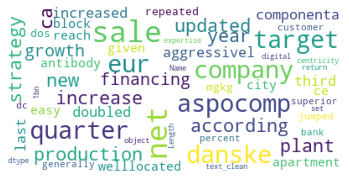

In [ ]:
wc = wordcloud.WordCloud(background_color='white', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

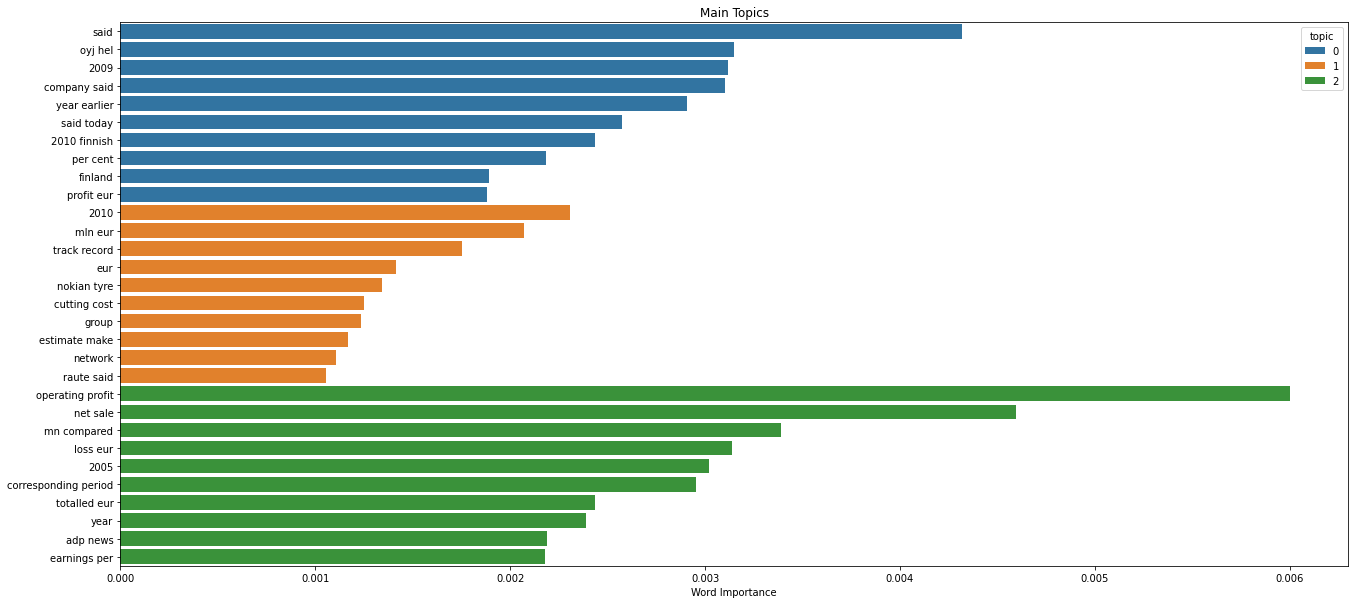

In [ ]:
## pre-process corpus
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
                     len(lst_words), 2)]
    lst_corpus.append(lst_grams)
## map words to an id
id2word = gensim.corpora.Dictionary(lst_corpus)
## create dictionary word:freq
dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] 
## train LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=3, random_state=123, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
   
## output
lst_dics = []
for i in range(0,3):
    lst_tuples = lda_model.get_topic_terms(i)
    for tupla in lst_tuples:
        lst_dics.append({"topic":i, "id":tupla[0], 
                         "word":id2word[tupla[0]], 
                         "weight":tupla[1]})
dtf_topics = pd.DataFrame(lst_dics, 
                         columns=['topic','id','word','weight'])
    
## plot
fig_dims = (22, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()

Positive words


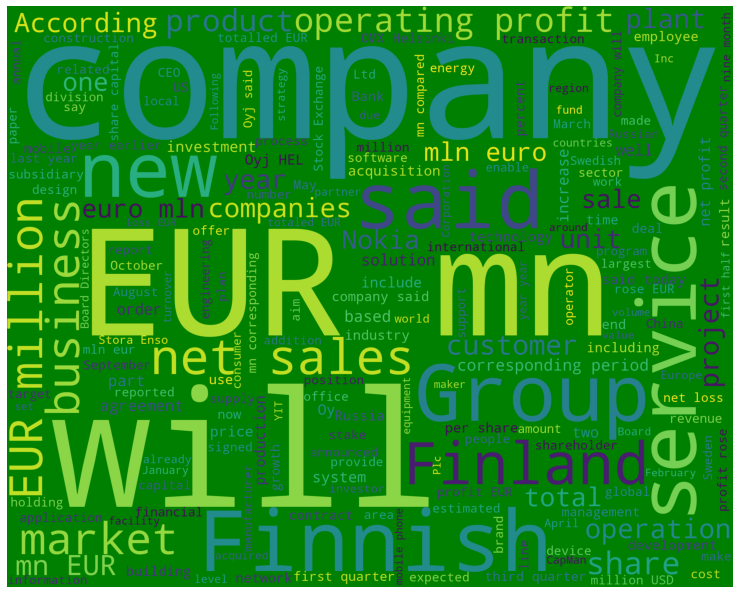

Negative words


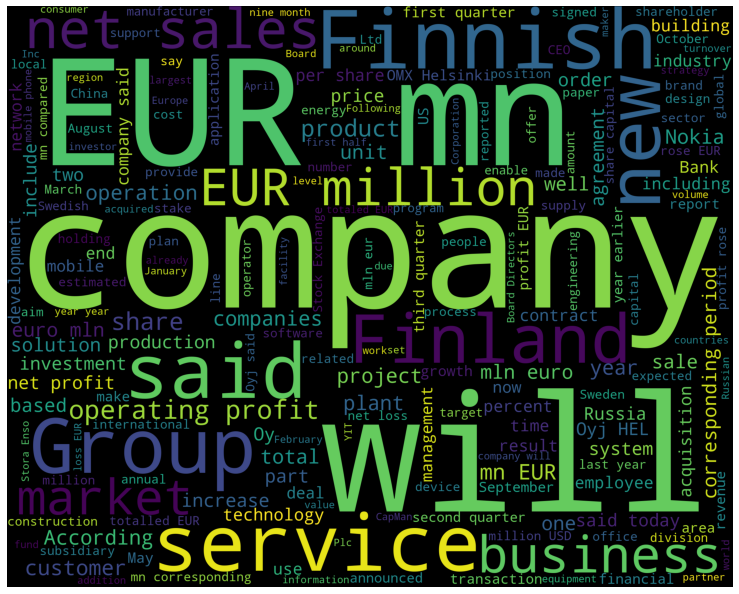

Neutral words


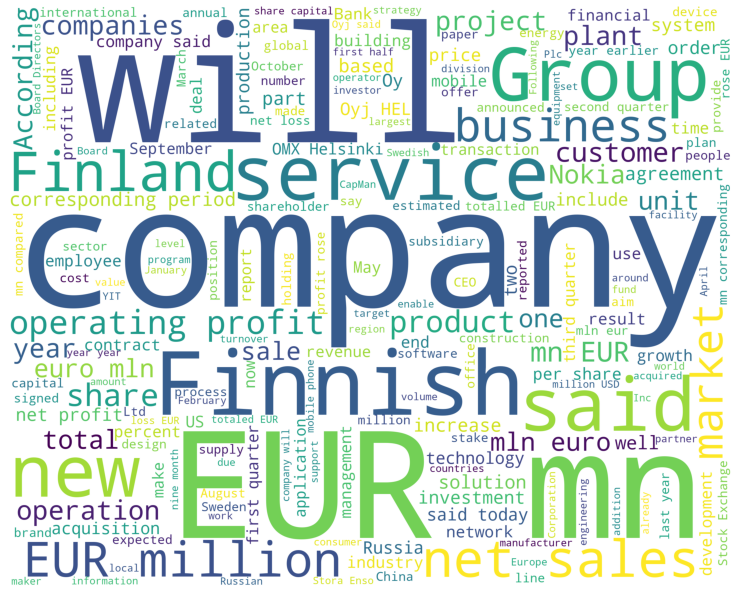

In [ ]:
from wordcloud import WordCloud,STOPWORDS
train_pos = df[ df['Sentiment'] == 'Positive']
train_pos = df ['News']
train_neg = df[ df['Sentiment'] == 'Negative']
train_neg = df ['News']
train_neu = df[ df['Sentiment'] == 'Neutral']
train_neu = df ['News']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'green')
print("Negative words")
wordcloud_draw(train_neg)
print("Neutral words")
wordcloud_draw(train_neu,'white')